<a href="https://colab.research.google.com/github/rubaTech/SCAI-Final-trainning/blob/main/Online_Payments_Fraud_Detection_using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Online Payments Fraud Detection using ML

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("Transactions (2).csv")

In [ ]:
data.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [ ]:
data.shape

(6362620, 11)

In [ ]:
data.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [ ]:
# Check for null values
data.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [ ]:
data = data.drop(index=2169696)
# Check for null values
data.isnull().sum()


,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6362619 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 582.5+ MB


In [ ]:
data['isFraud'] = data['isFraud'].astype(int)
data['isFlaggedFraud'] = data['isFlaggedFraud'].astype(int)

# Check
print(data.dtypes)


step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object


In [ ]:

numeric_data = data.select_dtypes(include=['int64', 'float64'])

correlation = numeric_data.corr()

print(correlation["isFraud"].sort_values(ascending=False))


isFraud           1.000000
amount            0.076688
isFlaggedFraud    0.044109
step              0.031578
oldbalanceOrg     0.010154
newbalanceDest    0.000535
oldbalanceDest   -0.005885
newbalanceOrig   -0.008148
Name: isFraud, dtype: float64


In [ ]:
print(data['isFlaggedFraud'].value_counts())


isFlaggedFraud
0    6362603
1         16
Name: count, dtype: int64


In [ ]:

data.drop(columns=['isFlaggedFraud'], inplace=True)

#Transaction type
data.type.value_counts()

,count
type,
CASH_OUT,2237499
PAYMENT,2151495
CASH_IN,1399284
TRANSFER,532909
DEBIT,41432


In [ ]:
# Distribution of Transaction Types
type=data["type"].value_counts()
transaction=type.index
quantity=type.values

import plotly.express as px
figure=px.pie(data,values=quantity,names=transaction,hole=0.5,title="Distribution of Transaction Types")
figure.show()




In [ ]:
#Transform categorical features into numerical
data["type"]=data["type"].replace({"CASH_OUT":1,"PAYMENT":2,"CASH_IN":3
                                   , "TRANSFER":4,"DEBIT":5})

/tmp/ipython-input-2258091386.py:2: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [ ]:
#Transform the values of the isFraud column
data["isFraud"]=data["isFraud"].replace({0:"No Fraud",1:"Fraud"})

In [ ]:
data.tail(500)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
6362120,718,2,3311.02,C1779665081,3259.00,0.00,M991872349,0.00,0.00,No Fraud
6362121,718,2,3277.82,C1849451718,8179.00,4901.18,M1298498147,0.00,0.00,No Fraud
6362122,718,1,166870.75,C994417974,2429.00,0.00,C522662505,93480.91,260351.66,No Fraud
6362123,718,2,9850.63,C1983677230,21085.00,11234.37,M2074854267,0.00,0.00,No Fraud
6362124,718,4,113826.86,C448540919,99349.00,0.00,C895719835,0.00,113826.86,No Fraud
...,...,...,...,...,...,...,...,...,...,...
6362615,743,1,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,Fraud
6362616,743,4,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,Fraud
6362617,743,1,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,Fraud
6362618,743,4,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,Fraud


In [ ]:
#selecting features and splitting dataset
from sklearn.model_selection import train_test_split

x = np.array(data[["step", "type", "amount", "oldbalanceOrg", "newbalanceOrig"]])
y = np.array(data["isFraud"])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=42)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


model1 = DecisionTreeClassifier()
model2 = LogisticRegression(max_iter=1000)
model3=RandomForestClassifier()
model4=KNeighborsClassifier()
model1.fit(x_train,y_train)
model2.fit(x_train,y_train)
model3.fit(x_train,y_train)
model4.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
# Print the accuracy of different classification models on the test set
print('Decision Tree Classifier :' ,model1.score(x_test,y_test))
print('Logistic Regression :' ,model2.score(x_test,y_test))
print('Random Forest Classifier :' ,model3.score(x_test,y_test))
print('KNeighbors Classifier :' ,model4.score(x_test,y_test))

Decision Tree Classifier : 0.9996416570532265
Logistic Regression : 0.999185869971804
Random Forest Classifier : 0.9996746623246399
KNeighbors Classifier : 0.999677805683822


In [ ]:
#prediction ["step","type","amount","oldbalanceOrg","newbalanceOrig"]
features=np.array([[4,4,9000.60,9000.60,0.0]])
print(model1.predict(features))
print(model2.predict(features))
print(model3.predict(features))
print(model4.predict(features))

['Fraud']
['No Fraud']
['Fraud']
['No Fraud']


In [ ]:
#prediction ["step","type","amount","oldbalanceOrg","newbalanceOrig"]
features=np.array([[1,4,181.00,181.00,0]])
print(model1.predict(features))
print(model2.predict(features))
print(model3.predict(features))
print(model4.predict(features))

['Fraud']
['No Fraud']
['Fraud']
['Fraud']


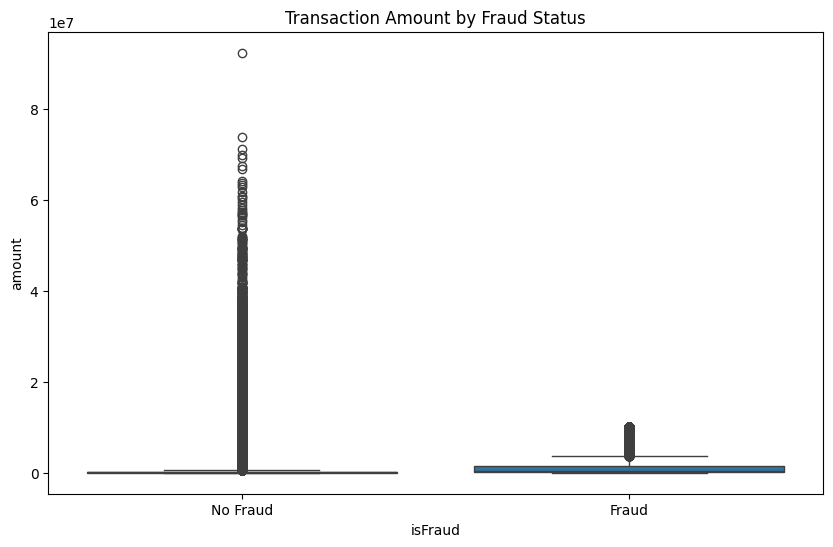

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x="isFraud", y="amount", data=data)
plt.title("Transaction Amount by Fraud Status")
plt.show()